#### Context

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

#### Attributes

People : <br><br>

ID: Customer's unique identifier<br>
Year_Birth: Customer's birth year<br>
Education: Customer's education level<br>
Marital_Status: Customer's marital status<br>
Income: Customer's yearly household income<br>
Kidhome: Number of children in customer's household<br>
Teenhome: Number of teenagers in customer's household<br>
Dt_Customer: Date of customer's enrollment with the company<br>
Recency: Number of days since customer's last purchase<br>
Complain: 1 if customer complained in the last 2 years, 0 otherwise<br><br>


Products : <br><br>

MntWines: Amount spent on wine in last 2 years<br>
MntFruits: Amount spent on fruits in last 2 years<br>
MntMeatProducts: Amount spent on meat in last 2 years<br>
MntFishProducts: Amount spent on fish in last 2 years<br>
MntSweetProducts: Amount spent on sweets in last 2 years<br>
MntGoldProds: Amount spent on gold in last 2 years<br><br>


Promotion : <br><br>

NumDealsPurchases: Number of purchases made with a discount<br>
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise<br><br>

Place: <br><br>

NumWebPurchases: Number of purchases made through the company’s web site<br>
NumCatalogPurchases: Number of purchases made using a catalogue<br>
NumStorePurchases: Number of purchases made directly in stores<br>
NumWebVisitsMonth: Number of visits to company’s web site in the last month<br>

### Problem Statement 2

Build a classification model (binomial or multinomial - recommended: xgboost python implementation) on the promotion done by the company. Run SHAP analysis on the model results, and write a short text of what would be your recommendation to business for the next round of campaigns.

#### 1. Importing Libraries

In [468]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")#to hide or ignore the warnings

In [469]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [470]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder

In [471]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn import tree

In [472]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from imblearn.over_sampling import SMOTE

#### 2. Data understanding

In [473]:
#Importing the data set. 
data = pd.read_csv('D:\M. Tech in Data Science & Machine Learning\Internship_or_jobs\#####\marketing_campaign.csv', sep="\t")
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [474]:
df=data.copy()#making a copy of the orignal dataframe

In [475]:
df.shape#total 2240 rows and 29 features

(2240, 29)

In [476]:
#There are 2240 rows and 29 features in the Dataset

In [477]:
#Analysing the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [478]:
#There are missing values in income

In [479]:
#Looking at the standard measures of the data. 
df.describe()#stastical summary

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [480]:
df.isnull().sum()#checking for null values

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [481]:
#percentage of missing values
(df.isnull().sum()/len(df))*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [482]:
#Percentage of missing values in Income is 1%

Box plot for the column :  ID


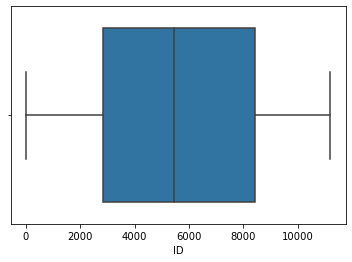

Box plot for the column :  Year_Birth


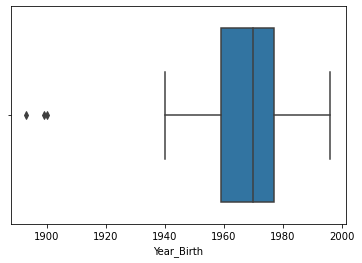

Box plot for the column :  Income


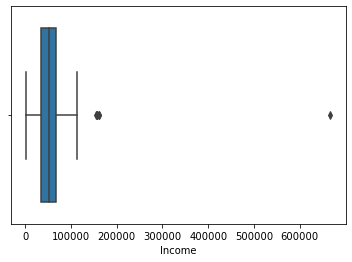

Box plot for the column :  Kidhome


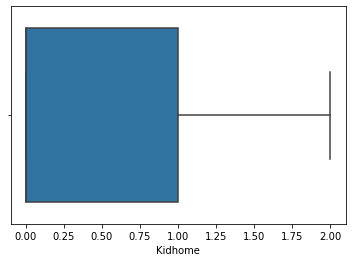

Box plot for the column :  Teenhome


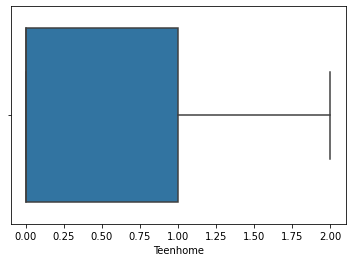

Box plot for the column :  Recency


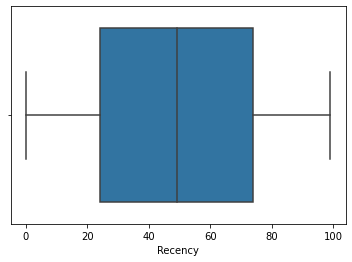

Box plot for the column :  MntWines


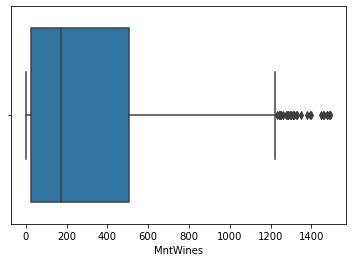

Box plot for the column :  MntFruits


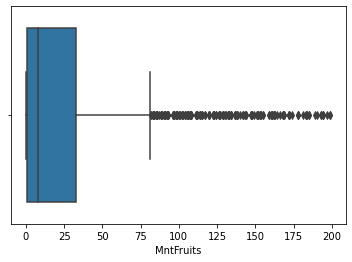

Box plot for the column :  MntMeatProducts


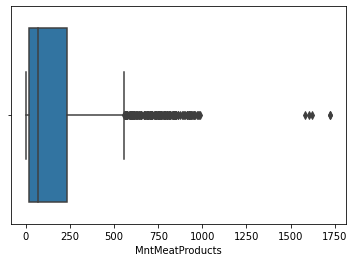

Box plot for the column :  MntFishProducts


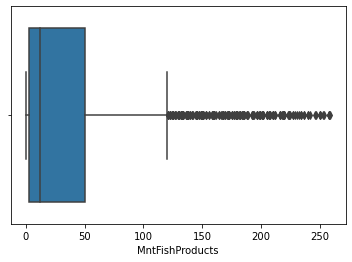

Box plot for the column :  MntSweetProducts


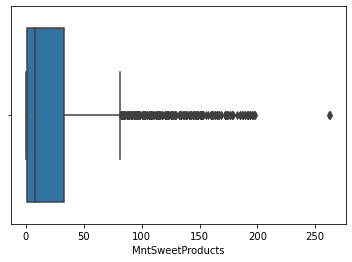

Box plot for the column :  MntGoldProds


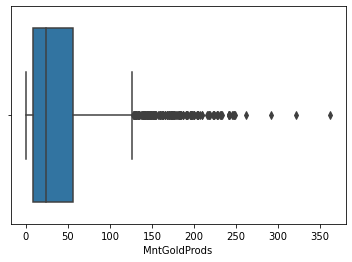

Box plot for the column :  NumDealsPurchases


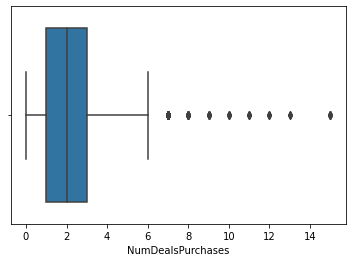

Box plot for the column :  NumWebPurchases


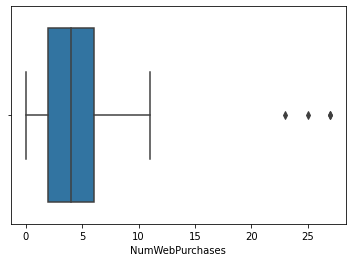

Box plot for the column :  NumCatalogPurchases


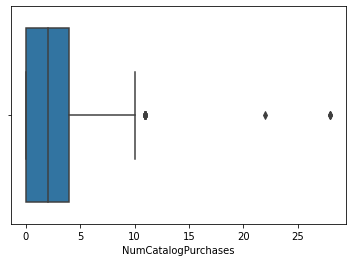

Box plot for the column :  NumStorePurchases


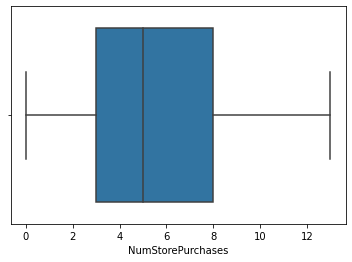

Box plot for the column :  NumWebVisitsMonth


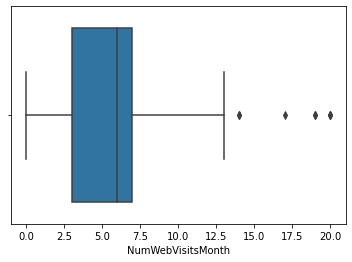

Box plot for the column :  AcceptedCmp3


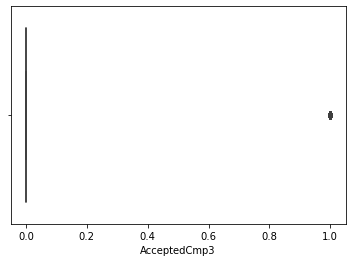

Box plot for the column :  AcceptedCmp4


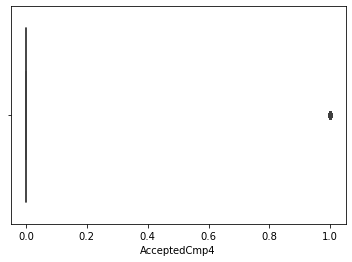

Box plot for the column :  AcceptedCmp5


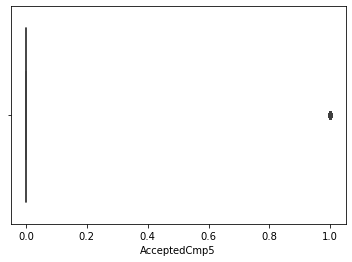

Box plot for the column :  AcceptedCmp1


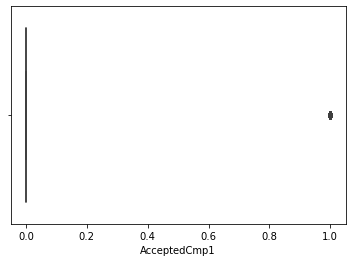

Box plot for the column :  AcceptedCmp2


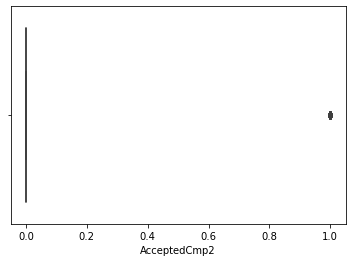

Box plot for the column :  Complain


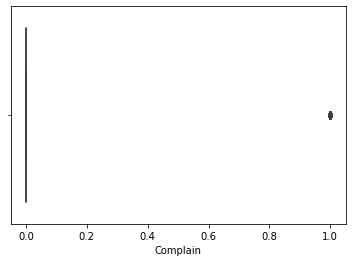

Box plot for the column :  Z_CostContact


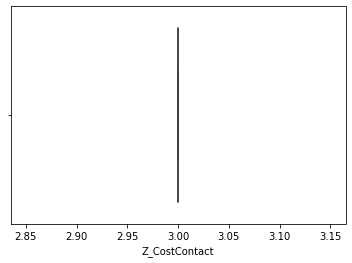

Box plot for the column :  Z_Revenue


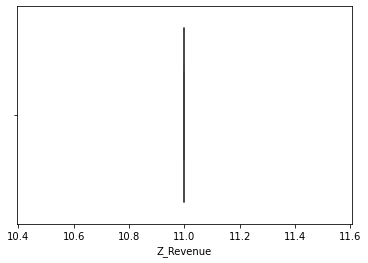

Box plot for the column :  Response


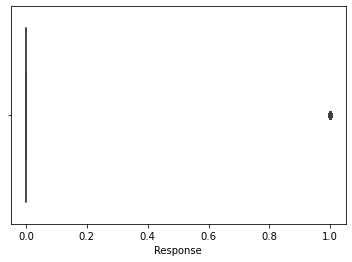

In [483]:
#checking for outliers
for i in df.select_dtypes(include=np.number).columns:
    print('Box plot for the column : ',i)
    sns.boxplot(df[i])
    plt.show()

In [484]:
#There are some outliers present in some features which can be ignored for now

#### 3. Data Cleaning and Preprocssing

In [485]:
df1=df.copy()#making a copy of the dataframe

In [486]:
#missing values treatment

In [487]:
df1['Income'].skew()#checking the skewness of the data

6.763487372811116

In [488]:
df1['Income'].mean()#mean

52247.25135379061

In [489]:
df1['Income'].median()#median

51381.5

In [490]:
#As there are some outliers present in the Income feature, we will replace the missing values by median

In [491]:
df1.fillna(df['Income'].mean(), inplace=True)

In [495]:
#Similarly doing it for kids and teens columns

In [496]:
df1['Kids_Teen'] = df1['Kidhome'] + df1['Teenhome']
df1['Kids_Teen'].head()

0    0
1    2
2    0
3    1
4    1
Name: Kids_Teen, dtype: int64

In [498]:
#Column  "Dt_Customer"  indicates Date of customer's enrollment with the company. 

In [499]:
# customer's enrollment time till the first day of the next year
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])
df1['Last_Date'] = '01-01-2015'
df1['Last_Date'] = pd.to_datetime(df1['Last_Date'])
df1['Enrollment_Days'] = (df1['Last_Date'] - df1['Dt_Customer']).dt.days
df1['Enrollment_Days'].head()

0    997
1    151
2    498
3     91
4    347
Name: Enrollment_Days, dtype: int64

In [500]:
#extracting the Age of the customer for the Year of Birth 

In [501]:
df1['Age'] = 2021-df1['Year_Birth']
df1['Age'].head()

0    64
1    67
2    56
3    37
4    40
Name: Age, dtype: int64

In [502]:
#Lets try to create the Target variable as wheter customer has customers accepted the offer or not (Binary , Binomial)

In [503]:
#creating of Target Variable 

In [504]:
df1['Target']=df1['AcceptedCmp1']+df1['AcceptedCmp2']+df1['AcceptedCmp3']+df1['AcceptedCmp4']+df1['AcceptedCmp5']+df1['Response']

In [505]:
df1['Target'].value_counts()

0    1631
1     370
2     142
3      51
4      36
5      10
Name: Target, dtype: int64

In [506]:
#1 to 5: customer has customers accepted the offer atleat 1
#0 : not yet accepted the offer

In [507]:
#Replacing 1 to 5 by 1 and keeping Zero as it is

In [508]:
df1['Target'].replace([1,2,3,4,5],1,inplace =True)#assigning 1 means these customers accepted the offer in the 1st campaign

In [509]:
df1['Target'].value_counts()

0    1631
1     609
Name: Target, dtype: int64

In [510]:
#we can see out target variable is imbalaced

In [511]:
#Dropping some unwanted columns or features

In [512]:
df1=df1.drop(columns=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Response','Kidhome','Teenhome'])
df1=df1.drop(columns=['Z_CostContact', 'Z_Revenue','ID','Dt_Customer','Last_Date','Year_Birth','Complain'])
#df1=df1.drop(columns=[ 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds'])

In [513]:
df1.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Kids_Teen,Enrollment_Days,Age,Target
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,997,64,1
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,2,151,67,0
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,498,56,0
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,1,91,37,0
4,PhD,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,1,347,40,0


In [514]:
data1=df1.copy()#making a copy of the data frame

#### 4. Data Encoding

In [515]:
label_encoder=LabelEncoder()
for i in df1.select_dtypes(include='object').columns:
    df1[i]=label_encoder.fit_transform(df1[i])

In [516]:
df1.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Kids_Teen,Enrollment_Days,Age,Target
0,2,4,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,997,64,1
1,2,4,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,2,151,67,0
2,2,5,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,498,56,0
3,2,5,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,1,91,37,0
4,4,3,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,1,347,40,0


In [517]:
X=df1.drop('Target',axis=1)#Independent variables
Y=df1['Target']#Target variables

#### 5. Data Scaling

In [518]:
sc=StandardScaler()
df_new=sc.fit_transform(X)
df2=pd.DataFrame(df_new,columns=X.columns)
df2.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Kids_Teen,Enrollment_Days,Age
0,-0.350141,0.251004,0.235327,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,-1.264505,1.976745,0.985345
1,-0.350141,0.251004,-0.235826,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,1.396361,-1.667011,1.235733
2,-0.350141,1.180340,0.773633,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-1.264505,-0.172468,0.317643
3,-0.350141,1.180340,-1.022732,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,0.065928,-1.925433,-1.268149
4,1.428354,-0.678332,0.241519,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,0.065928,-0.822831,-1.017761


#### 6. Data Modelling

In [519]:
#Modelling

In [520]:
#Performing SMOTE to make the dataset balanced

In [521]:
sm=SMOTE(random_state=2)
X1,Y1=sm.fit_resample(X,Y)

In [522]:
Y1.value_counts()

0    1631
1    1631
Name: Target, dtype: int64

In [523]:
#Data is balanced

In [524]:
#splitting the Data
x_train,x_test,y_train,y_test= train_test_split(X1,Y1,test_size=0.3, random_state=2)

In [525]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2283, 18)
(979, 18)
(2283,)
(979,)


In [526]:
#XGBClassifier (The XGBoost model for classification is called XGBClassifier)

In [527]:
from xgboost import XGBClassifier

In [528]:
xgb=XGBClassifier(max_depth = 10, gamma = 1)
XGB_Classifier=xgb.fit(x_train,y_train)

[12:10:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [529]:
xgb_pred=XGB_Classifier.predict(x_test)

In [530]:
print(classification_report(xgb_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       479
           1       0.90      0.86      0.88       500

    accuracy                           0.88       979
   macro avg       0.88      0.88      0.88       979
weighted avg       0.88      0.88      0.88       979



In [531]:
confusion_matrix(xgb_pred,y_test)

array([[432,  47],
       [ 69, 431]], dtype=int64)

In [532]:
accuracy_score(xgb_pred,y_test)*100

88.1511746680286

In [533]:
#Inference:

#Accuracy of the model is almost 88%

#Precison of the model is high amlost 88%

#TPR(true positive rate) ie, Recall is also high 88%

In [534]:
#Roc Curve

In [535]:
fpr,tpr,threshold=metrics.roc_curve(xgb_pred,y_test)
roc_auc=metrics.auc(fpr,tpr)

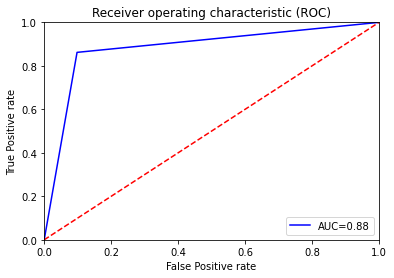

In [536]:
plt.title('Receiver operating characteristic (ROC)')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [537]:
#Interpretation: 
#The red dotted line represents the ROC curve of a purely random classifier; 
#a good classifier stays as far away from that line as possible (toward the top-left corner).

#From the above plot, we can see that our classifier (XGBClassifier) is away from the red dotted line; 
#with the AUC score 0.88.

In [538]:
#checking if the model is overfitted

In [539]:
xgb_pred_train=XGB_Classifier.predict(x_train)

In [540]:
print(classification_report(xgb_pred_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1129
           1       1.00      1.00      1.00      1154

    accuracy                           1.00      2283
   macro avg       1.00      1.00      1.00      2283
weighted avg       1.00      1.00      1.00      2283



In [541]:
confusion_matrix(xgb_pred_train,y_train)

array([[1127,    2],
       [   3, 1151]], dtype=int64)

In [542]:
accuracy_score(xgb_pred_train,y_train)*100

99.78098992553657

In [543]:
#Inference:

#Accuracy of the model is almost 99

#Precison of the model is high amlost 99

#TPR(true positive rate) ie, Recall is also high 99

In [544]:
#As per train and test accuracy there is overfitting in the model

In [545]:
#Tune the Hyperparameters (GridSearchCV)

In [546]:
from sklearn.model_selection import GridSearchCV

In [547]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1],
                     'max_depth': range(2,8),
                     'gamma': [0, 1, 2, 3, 4]}

In [548]:
xgb_model1 = XGBClassifier()

xgb_grid1 = GridSearchCV(estimator = xgb_model1, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid1.fit(x_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid1.best_params_, '\n')

[12:11:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [549]:
xgb_model2 = XGBClassifier(max_depth = 4, gamma = 0,learning_rate= 0.5)

# fit the model using fit() on train data
XGBoost2=xgb_model2.fit(x_train, y_train)

[12:16:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [550]:
xgb_preds_3 = XGBoost2.predict(x_test)

In [551]:
print(classification_report(xgb_preds_3,y_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       476
           1       0.89      0.84      0.87       503

    accuracy                           0.87       979
   macro avg       0.87      0.87      0.87       979
weighted avg       0.87      0.87      0.87       979



In [552]:
confusion_matrix(xgb_preds_3,y_test)

array([[423,  53],
       [ 78, 425]], dtype=int64)

In [553]:
accuracy_score(xgb_preds_3,y_test)

0.8661899897854954

In [554]:
#Inference:

#Accuracy of the model is almost 87

#Precison of the model is high amlost 87

#TPR(true positive rate) ie, Recall is also high 87

In [555]:
#feature Importance for XGBoost model

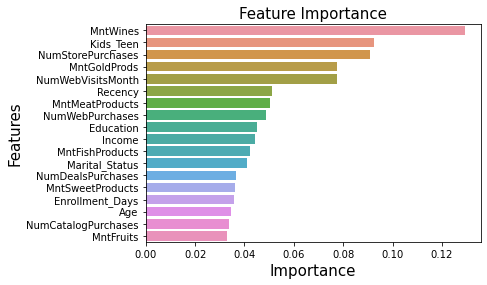

In [556]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': XGBoost2.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

#### 7. SHAP analysis

In [557]:
#!pip install shap

In [558]:
import shap

In [559]:
shap_values = shap.TreeExplainer(XGBoost2).shap_values(X)

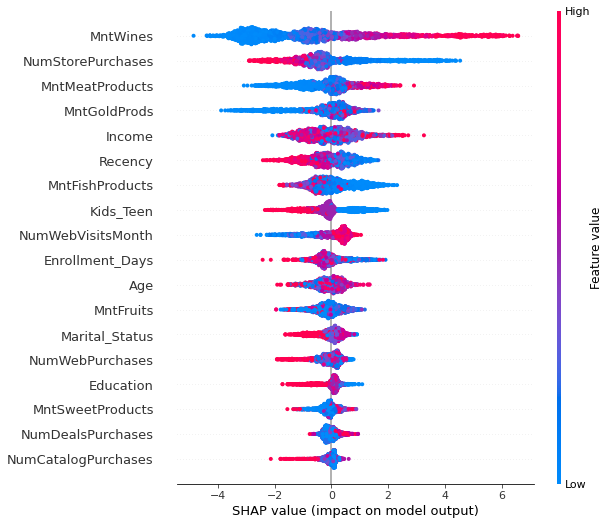

In [560]:
shap.summary_plot(shap_values, X)

In [561]:
#SHAP Dependence Plots

In [562]:
#Plots the value of the feature on the x-axis and the SHAP value of the same feature
#on the y-axis. This shows how the model depends on the given feature, and is like a
#richer extenstion of the classical parital dependence plots. 

In [563]:
#some exmaples of the dependence plots

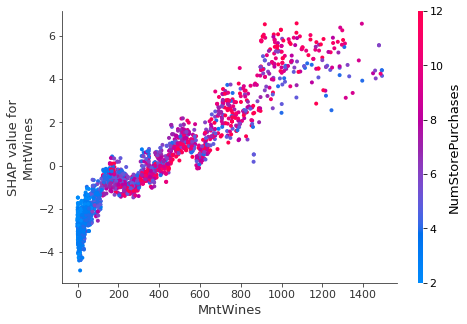

In [564]:
shap.dependence_plot("MntWines", shap_values, X)

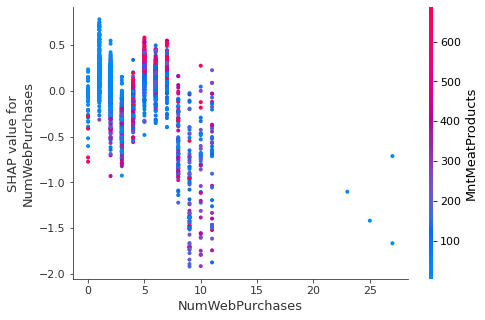

In [565]:
shap.dependence_plot("NumWebPurchases", shap_values, X)

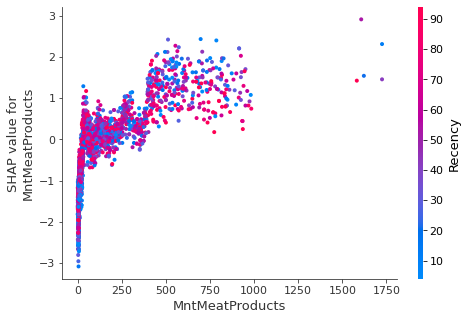

In [566]:
shap.dependence_plot("MntMeatProducts", shap_values, X)

In [ ]:
#-----------------------------------------------------------END-------------------------------------------------------#